<a href="https://colab.research.google.com/github/sourcecode369/deep-nlp/blob/master/word%20embeddings/Word_Embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import absolute_import, print_function, unicode_literals, division
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers 
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

TensorFlow 2.x selected.


In [0]:
(train_data, test_data), info = tfds.load('imdb_reviews/subwords8k', split=(tfds.Split.TRAIN, tfds.Split.TEST), with_info=True, as_supervised=True)

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/0.1.0. Subsequent calls will reuse this data.


In [0]:
encoder = info.features['text'].encoder
encoder.subwords[:20]

['the_',
 ', ',
 '. ',
 'a_',
 'and_',
 'of_',
 'to_',
 's_',
 'is_',
 'br',
 'in_',
 'I_',
 'that_',
 'this_',
 'it_',
 ' /><',
 ' />',
 'was_',
 'The_',
 'as_']

In [0]:
padded_shapes = ([None], ())
train_batches = train_data.shuffle(1000).padded_batch(10, padded_shapes=padded_shapes)
test_batches = test_data.shuffle(1000).padded_batch(10, padded_shapes=padded_shapes)

In [0]:
train_batch, train_labels = next(iter(train_batches))
train_batch

<tf.Tensor: id=140, shape=(10, 695), dtype=int64, numpy=
array([[2829, 1319,    4, ...,    0,    0,    0],
       [  12,   81,  110, ...,    0,    0,    0],
       [  12,  284,   14, ...,    0,    0,    0],
       ...,
       [2442, 1971, 1365, ...,    0,    0,    0],
       [7916,  124,    2, ...,    0,    0,    0],
       [ 133,  771,    5, ...,    0,    0,    0]])>

In [0]:
embedding_dim=16

model = keras.Sequential([
  layers.Embedding(encoder.vocab_size, embedding_dim),
  layers.GlobalAveragePooling1D(),
  layers.Dense(16, activation='relu'),
  layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          130960    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 131,249
Trainable params: 131,249
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=["accuracy"])
history = model.fit(train_batches, epochs=20, validation_data=test_batches, validation_steps=20)

Epoch 1/20
2500/2500 [==============================] - 34s 14ms/step - loss: 0.5224 - accuracy: 0.7450 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/20
2500/2500 [==============================] - 24s 10ms/step - loss: 0.2857 - accuracy: 0.8932 - val_loss: 0.2767 - val_accuracy: 0.8700
Epoch 3/20
2500/2500 [==============================] - 24s 10ms/step - loss: 0.2325 - accuracy: 0.9173 - val_loss: 0.3256 - val_accuracy: 0.8700
Epoch 4/20
2500/2500 [==============================] - 25s 10ms/step - loss: 0.2016 - accuracy: 0.9298 - val_loss: 0.3772 - val_accuracy: 0.8550
Epoch 5/20
2500/2500 [==============================] - 24s 10ms/step - loss: 0.1791 - accuracy: 0.9388 - val_loss: 0.3340 - val_accuracy: 0.8850
Epoch 6/20
2500/2500 [==============================] - 24s 10ms/step - loss: 0.1615 - accuracy: 0.9443 - val_loss: 0.2431 - val_accuracy: 0.9000
Epoch 7/20
2500/2500 [==============================] - 24s 10ms/step - loss: 0.1447 - accuracy: 0.9517 - val_loss: 

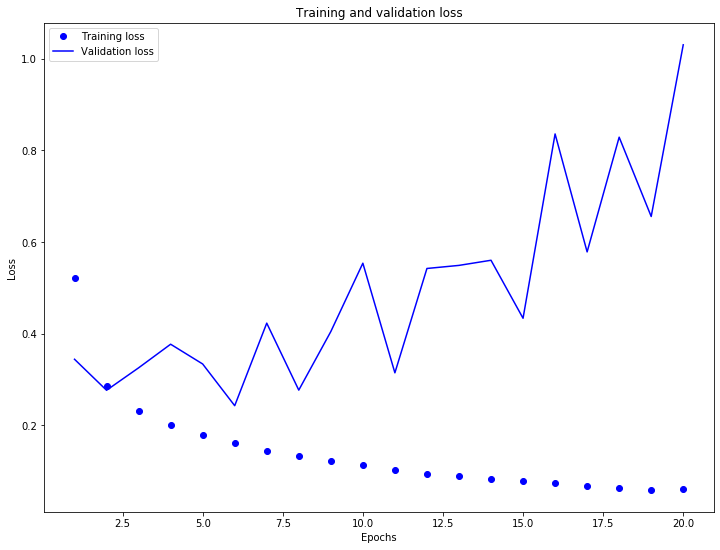

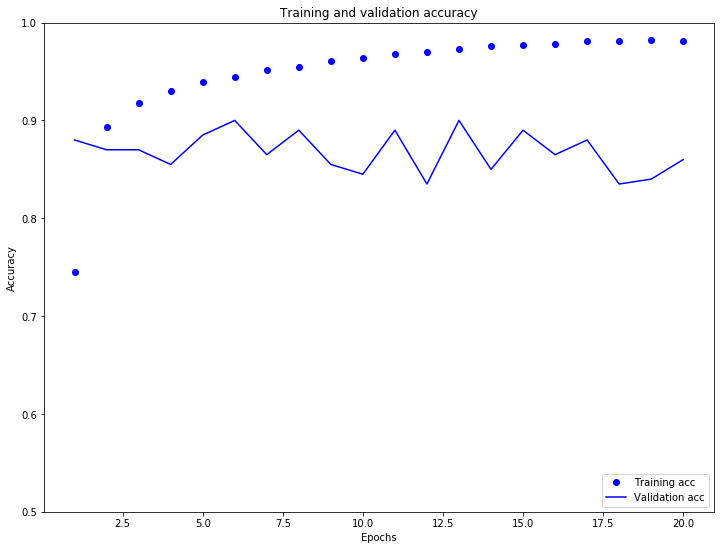

In [0]:
import matplotlib.pyplot as plt

history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,9))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(12,9))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim((0.5,1))
plt.show()

In [0]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(8185, 16)


In [0]:
import io

encoder = info.features['text'].encoder

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')

for num, word in enumerate(encoder.subwords):
  vec = weights[num+1] # skip 0, it's padding.
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
out_v.close()
out_m.close()

In [0]:
try:
  from google.colab import files
except ImportError:
   pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')